The Myers Briggs Type Indicator (or MBTI) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)

Intuition (N) – Sensing (S)

Thinking (T) – Feeling (F)

Judging (J) – Perceiving (P)


So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

From scientific or psychological perspective it is based on the work done on cognitive functions by Carl Jung i.e. Jungian Typology. This was a model of 8 distinct functions, thought processes or ways of thinking that were suggested to be present in the mind. Later this work was transformed into several different personality systems to make it more accessible, the most popular of which is of course the MBTI.

This dataset contains over 8600 rows of data, on each row is a person’s:

- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

## Importing all the necessary libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import re
import string
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tqdm import tqdm
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.utils import class_weight
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn import preprocessing

import tweepy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sb
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv('C:\\MBTI-Personality-Prediction-using-Tweets-master\\Dataset\\train_data.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


### Checking for the null values

In [5]:
df.isnull().any()

type     False
posts    False
dtype: bool

In [6]:
df.shape

(8675, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [8]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


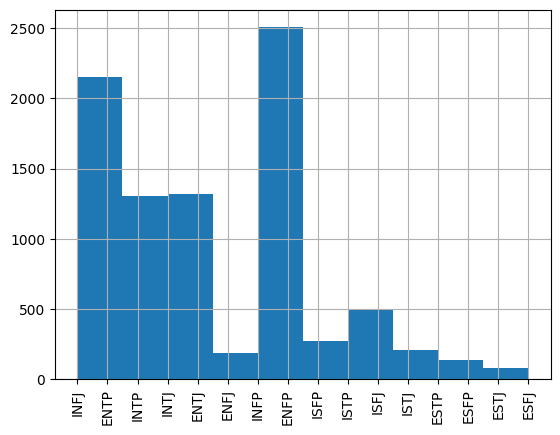

In [9]:
print(df.type.value_counts())
df.type.hist(xrot=90)
plt.show()

### Distribution of different personality types based on their frequencies in the dataset

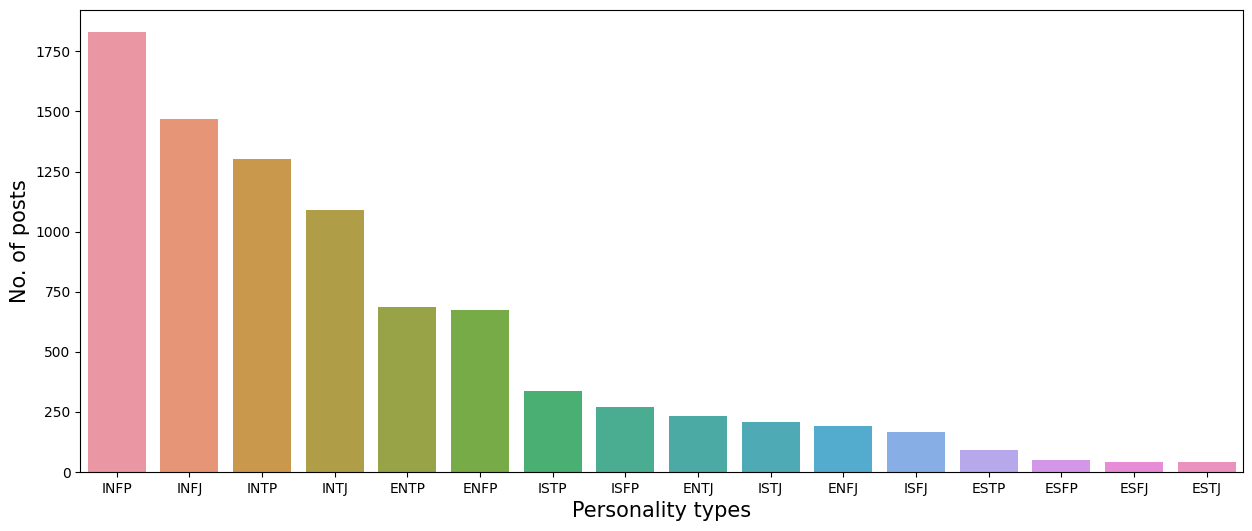

In [14]:
graph = df['type'].value_counts()
plt.figure(figsize=(15,6))
sb.barplot(x=graph.index, y=graph.values, alpha=1)
plt.xlabel('Personality types', fontsize=15)
plt.ylabel('No. of posts', fontsize=15)
plt.show()

-> Above plot shows INFP type personalities are most common in our dataset, while ESTJ are least

-> Now analysis based on each user's pattern of tweets is performed

In [12]:
df1 = df.copy()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

<AxesSubplot: xlabel='type', ylabel='words_per_tweet'>

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

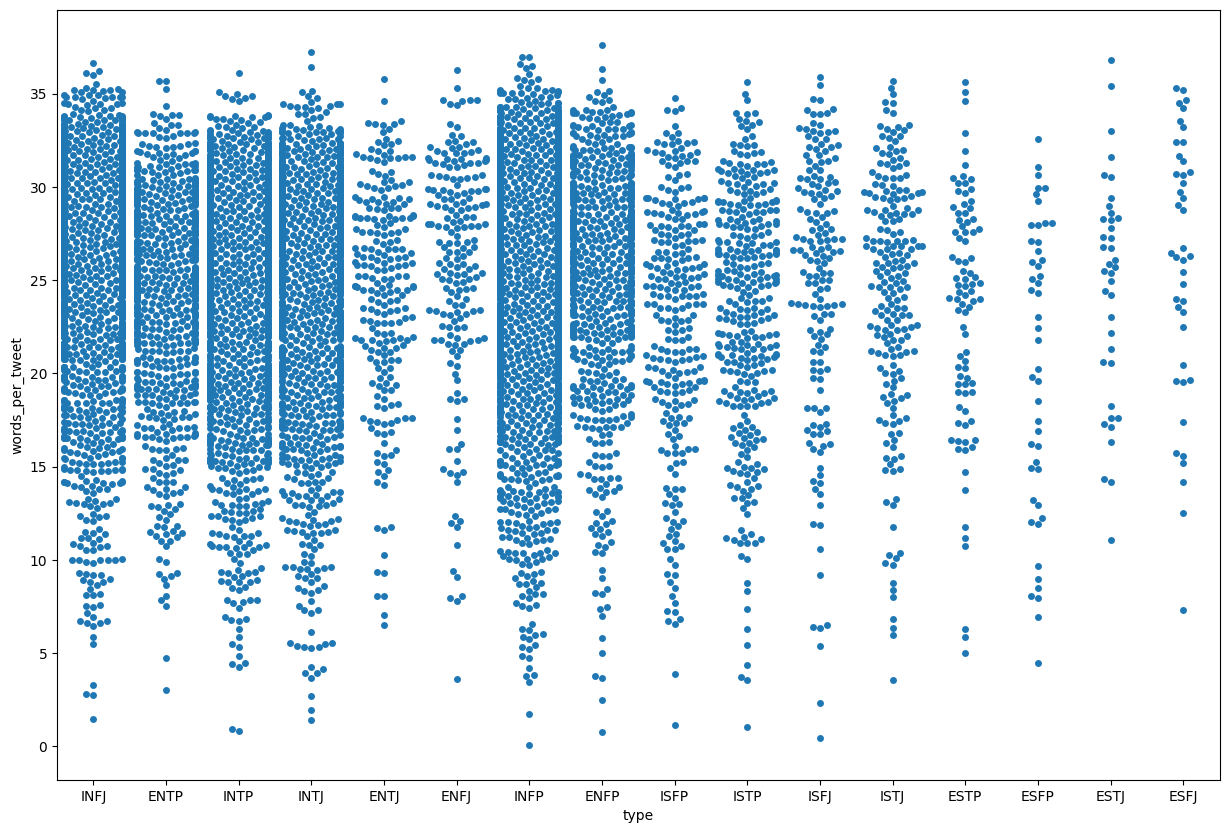

In [19]:
# Swarm Plot
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df1['words_per_tweet'] = df1['posts'].apply(lambda x: len(x.split())/50)
df1['variance_of_word_counts'] = df1['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sb.swarmplot(x="type", y="words_per_tweet", data=df1)

In [16]:
df1.head()

,type,posts,words_per_tweet,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


-> Now wordcloud based on 40 most common words in all posts is generated

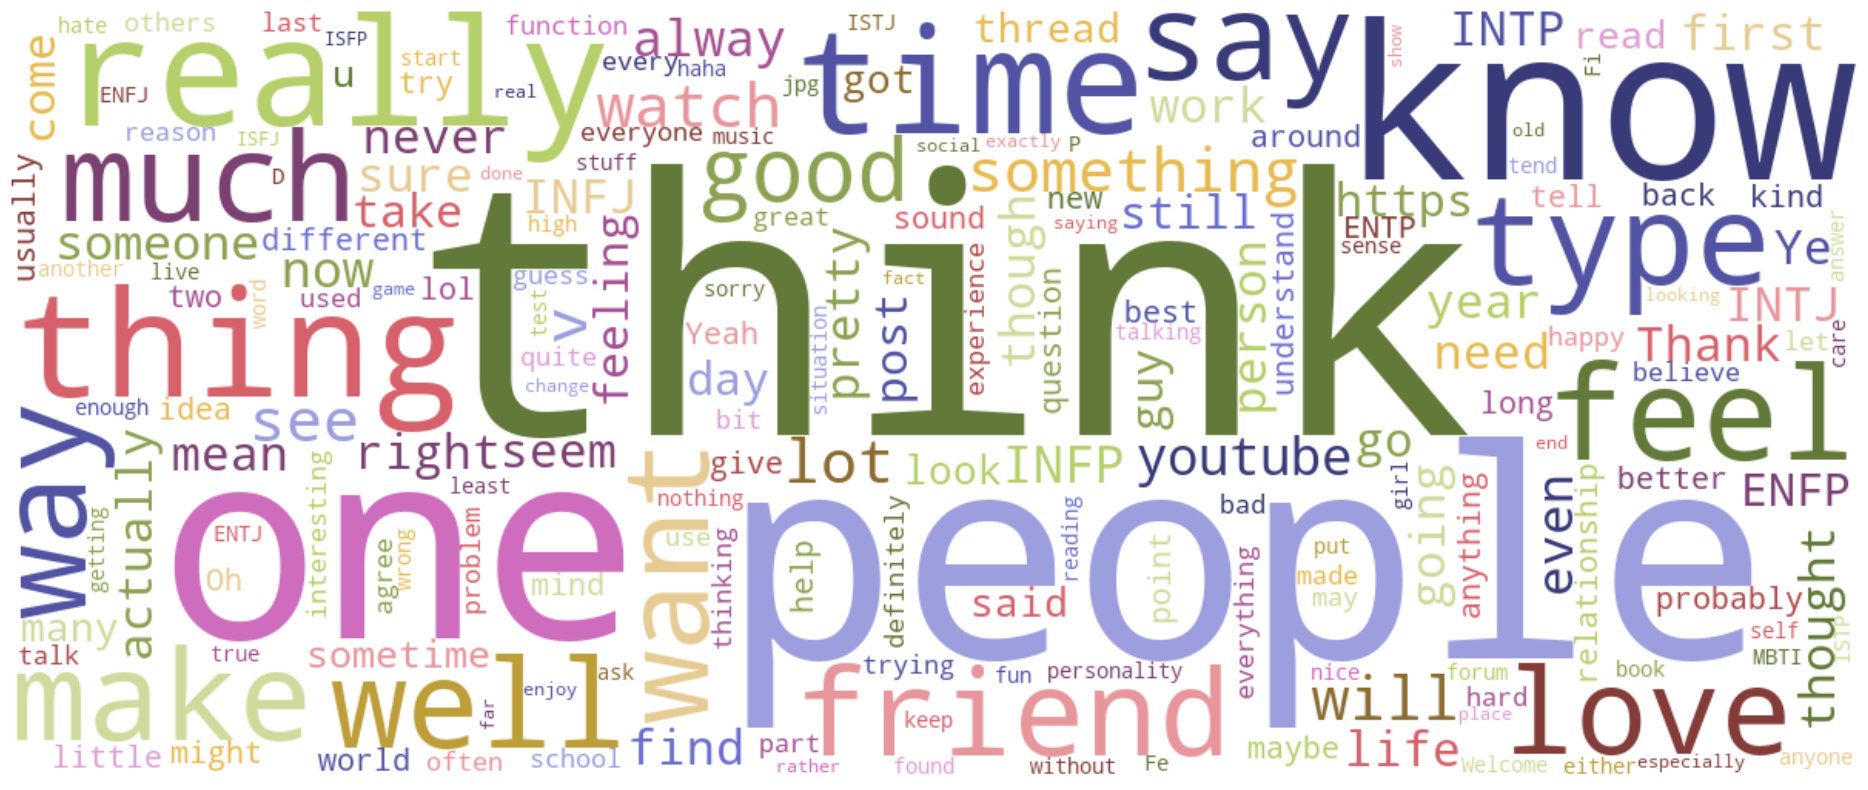

In [17]:
#Plotting WordCloud.

#Finding the most common words in all posts.
words = list(df1["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

-> 5 most common words from above figure are:-
- people
- think
- one
- know
- really

-> Now subplots of wordcloud corresponding to most frequent words in each of the 16 different personalities are generated

C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3120236201.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3120236201.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3120236201.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3120236201.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly cal

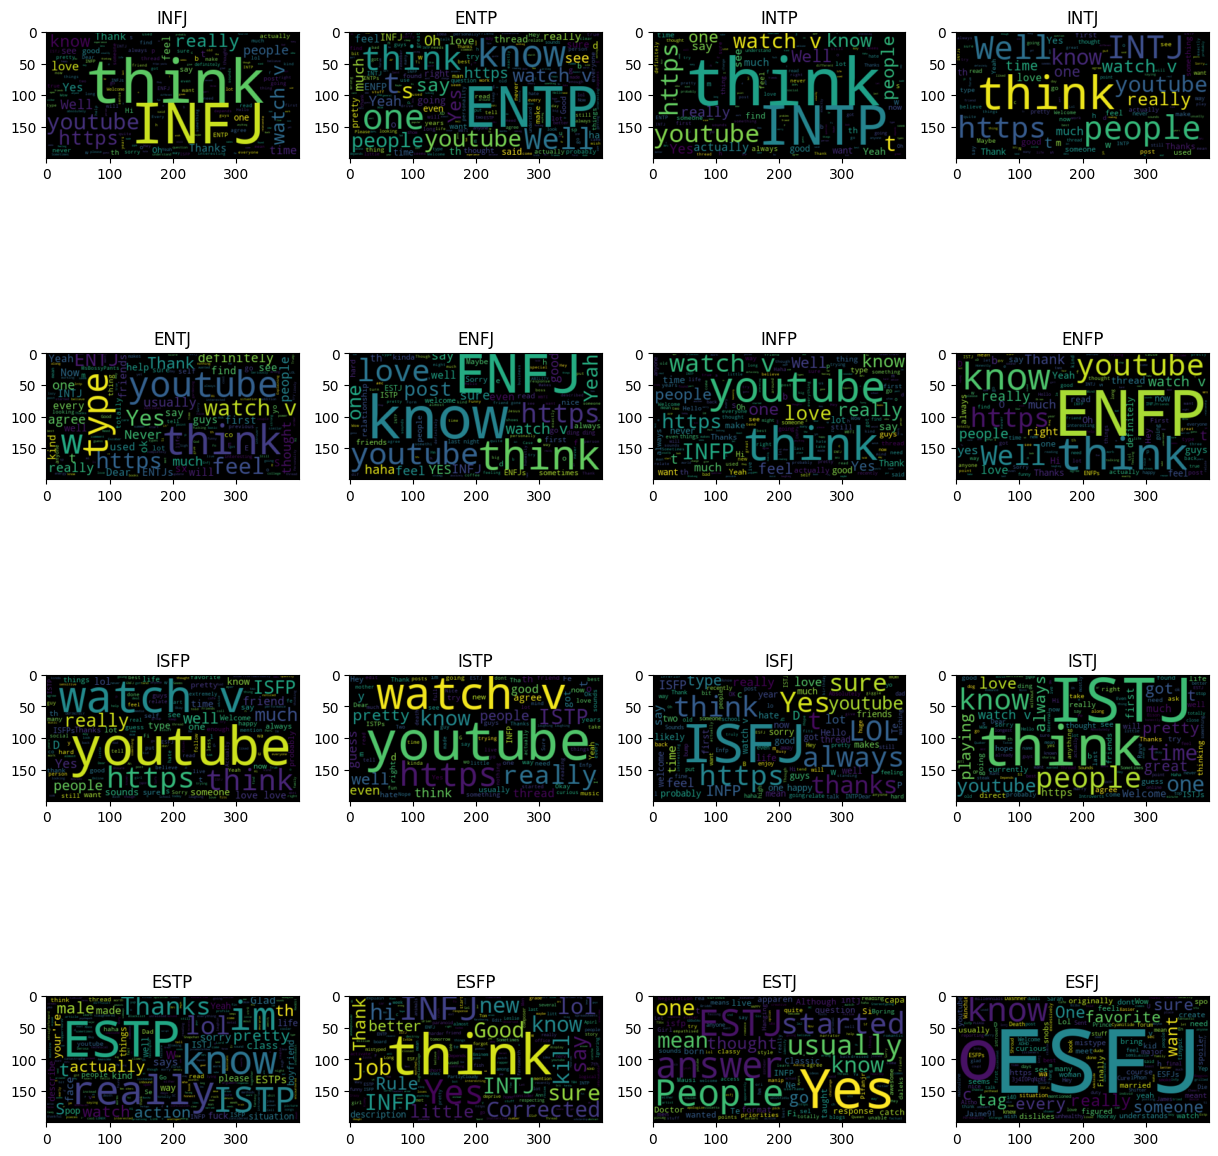

In [18]:
fig, ax = plt.subplots(len(df1['type'].unique()), sharex=True, figsize=(15,len(df1['type'].unique())))
k = 0
for i in df1['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

### -> Adding one column for each MBTI characteristic pair, since we will be training independent classifier model for each pair independently. The reason for this is because of imbalance present in our dataset as seen in the EDA section.

In [20]:
df['ie'] = df.type
df['ns'] = df.type
df['ft'] = df.type
df['pj'] = df.type

for i, t in enumerate(df.type):
    if 'I' in t:
        df.ie[i] = 'I'
    elif 'E' in t:
        df.ie[i] = 'E'
        
    if 'N' in t:
        df.ns[i] = 'N'
    elif 'S' in t:
        df.ns[i] = 'S'
        
    if 'F' in t:
        df.ft[i] = 'F'
    elif 'T' in t:
        df.ft[i] = 'T'
        
    if 'P' in t:
        df.pj[i] = 'P'
    elif 'J' in t:
        df.pj[i] = 'J'


posts = df.posts.values
yIE = df.ie.values
yNS = df.ns.values
yFT = df.ft.values
yPJ = df.pj.values
y = df.type

In [21]:
posts.shape

(8675,)

In [22]:
df.head()

,type,posts,ie,ns,ft,pj
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


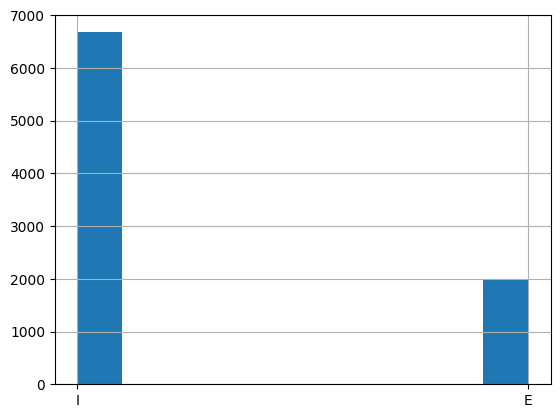

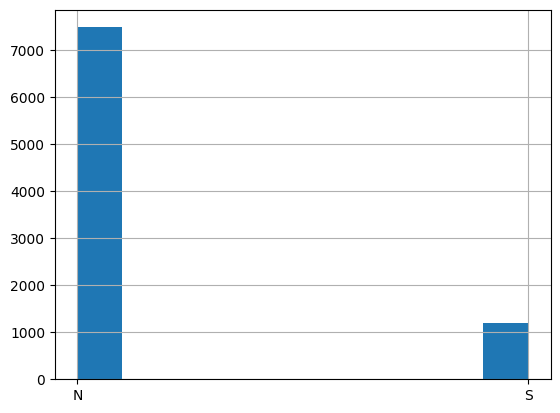

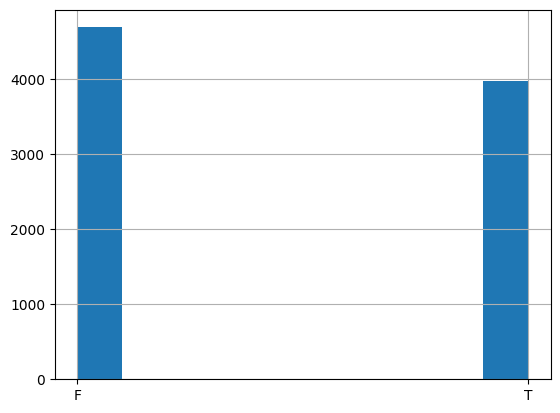

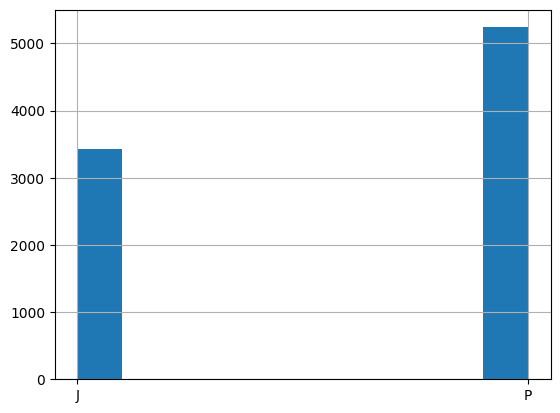

In [23]:
df.ie.hist(); plt.show()
df.ns.hist(); plt.show()
df.ft.hist(); plt.show()
df.pj.hist(); plt.show()

-> Above we can see that there is great unbalance in Introvert/Extrovert and Intuition/Sensing pairs. Whereas Feeling/Thinking and Perception/Judgment pairs are quite balanced.

How many Introvert posts are present v/s how many Extrovert posts are presnt, out of all the given entries in our labelled Kaggle dataset. This is done in order to explore the dataset for all the individual Personality Indices of MBTI

Counting No. of posts in one class / Total no. of posts in the other class

In [24]:
print ("Introversion (I) /  Extroversion (E):\t", df['ie'].value_counts()['I'], " / ", df['ie'].value_counts()['E'])
print ("Intuition (N) / Sensing (S):\t\t", df['ns'].value_counts()['N'], " / ", df['ns'].value_counts()['S'])
print ("Thinking (T) / Feeling (F):\t\t", df['ft'].value_counts()['F'], " / ", df['ft'].value_counts()['T'])
print ("Judging (J) / Perceiving (P):\t\t", df['pj'].value_counts()['P'], " / ", df['pj'].value_counts()['J'])

Introversion (I) /  Extroversion (E):	 6676  /  1999
Intuition (N) / Sensing (S):		 7478  /  1197
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


### -> Now data preprocessing is performed using regular expressions

In [25]:
#regular expressions for tokenization
regexes = [
    #urls
    #r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    
    #html
    #r'<[^>]+>',
    
    #punctuation
    r'(?:(\w+)\'s)',
    
    r'(?:\s(\w+)\.+\s)',
    r'(?:\s(\w+),+\s)',
    r'(?:\s(\w+)\?+\s)',
    r'(?:\s(\w+)!+\s)',
    
    r'(?:\'+(\w+)\'+)',
    r'(?:"+(\w+)"+)',
    r'(?:\[+(\w+)\]+)',
    r'(?:{+(\w+)}+)',
    r'(?:\(+(\w+))',
    r'(?:(\w+)\)+)',

    #words containing numbers & special characters & punctuation
    r'(?:(?:(?:[a-zA-Z])*(?:[0-9!"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~])+(?:[a-zA-Z])*)+)',
    
    #pure words
    r'([a-zA-Z]+)',
    
    #numbers
    #r'(?:(?:\d+,?)+(?:\.?\d+)?)',

    #emoticons
    #r"""(?:[:=;][oO\-]?[D\)\]\(\]/\\OpP])""",

    #other words
    #r'(?:[\w_]+)',

    #anything else
    #r'(?:\S)'
]

#compiling regular expression
regex = re.compile(r'(?:'+'|'.join(regexes)+')', re.VERBOSE | re.IGNORECASE)

-> Functions like tokenization, lemmatization and stopwords removal is performed

In [26]:

def preprocess(documents):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    #fetching list of stopwords
    punctuation = list(string.punctuation)
    swords = stopwords.words('english') + ['amp'] + ['infp', 'infj', 'intp', 'intj', 'isfp', 'isfj', 'enfp', 'enfj', 'entp', 'entj', 'esfp', 'esfj', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'feburary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',  'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',  'jan', 'feb', 'mar', 'apr', 'may', 'jun' 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'tommorow', 'today', 'yesterday'] + ['mr', 'mrs']


    processed_documents = []
    for i,document in enumerate(documents):
        print('{0}/{1}'.format(i+1, len(documents)))
        
        #tokenization
        tokens = regex.findall(document)

        #skipping useless tokens
        t_regex = re.compile(r"[^a-zA-Z]")
        document = []
        
        for token in tokens:
            token = np.array(token)
            token = np.unique(token[token != ''])
            
            if len(token) > 0:
                token = token[0].lower()
            else:
                continue
                
            if re.search(t_regex, token) == None and token not in swords:
                token = lemmatizer.lemmatize(token)
                document.append(token)
                
        document = ' '.join(document)

        #skipping
        if len(document) >= 0:
            processed_documents.append(document)

    print()
    return np.array(processed_documents)

In [27]:
%%time
posts = preprocess(posts)

1/8675
2/8675
3/8675
4/8675
5/8675
6/8675
7/8675
8/8675
9/8675
10/8675
11/8675
12/8675
13/8675
14/8675
15/8675
16/8675
17/8675
18/8675
19/8675
20/8675
21/8675
22/8675
23/8675
24/8675
25/8675
26/8675
27/8675
28/8675
29/8675
30/8675
31/8675
32/8675
33/8675
34/8675
35/8675
36/8675
37/8675
38/8675
39/8675
40/8675
41/8675
42/8675
43/8675
44/8675
45/8675
46/8675
47/8675
48/8675
49/8675
50/8675
51/8675
52/8675
53/8675
54/8675
55/8675
56/8675
57/8675
58/8675
59/8675
60/8675
61/8675
62/8675
63/8675
64/8675
65/8675
66/8675
67/8675
68/8675
69/8675
70/8675
71/8675
72/8675
73/8675
74/8675
75/8675
76/8675
77/8675
78/8675
79/8675
80/8675
81/8675
82/8675
83/8675
84/8675
85/8675
86/8675
87/8675
88/8675
89/8675
90/8675
91/8675
92/8675
93/8675
94/8675
95/8675
96/8675
97/8675
98/8675
99/8675
100/8675
101/8675
102/8675
103/8675
104/8675
105/8675
106/8675
107/8675
108/8675
109/8675
110/8675
111/8675
112/8675
113/8675
114/8675
115/8675
116/8675
117/8675
118/8675
119/8675
120/8675
121/8675
122/8675
123/8675
1

In [28]:
posts[0]

'moment sportscenter top ten play experience repeat perc experience immerse last thing friend posted facebook committing suicide next day rest sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth game wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier come three item determined type whichever type want would likely use given cognitive function whatnot left thing moderation sims indeed video game good one good one somewhat subjective completely promoting death given favorite video game growing current favorite video game appears late someone thought confidence good cherish time solitude revel within inner world whereas time workin enjoy time worry people always around lady complimentary main social outlet xbox live conversation even verbally fatigue really dig part thread requires high backyard roast eat marshmellows backyard conversing something intellectual foll

-> Now adding the preprocessed posts back in the dataframe

In [29]:
df['posts'] = posts
df.head(3)

,type,posts,ie,ns,ft,pj
0,INFJ,moment sportscenter top ten play experience re...,I,N,F,J
1,ENTP,finding lack post boring position often exampl...,E,N,T,P
2,INTP,one course say blessing absolutely positive be...,I,N,T,P


## Cleaning and preprocessing of test data

In [30]:
test_df = pd.read_csv("C:\\MBTI-Personality-Prediction-using-Tweets-master\\Dataset\\test_data.csv")
test_df.head()

,type,posts,Unnamed: 2
0,INTJ,Vladimir Putin met with Prime Minister of Arme...,NaN
1,ISTJ,"Welcome aboard, Michael! This year’s grants go...",NaN
2,ESFJ,I thank all those who are committed to allevia...,NaN
3,INTP,"I usually read a lot of non-fiction books, but...",NaN
4,ENTJ,Congratulations to Makhtar Diop on your histor...,NaN


### Visualizations on Test Data

In [31]:
test_df_male = test_df.iloc[:17,:]
test_df_female = test_df.iloc[18:,:]

In [32]:
test_df_male.head()

,type,posts,Unnamed: 2
0,INTJ,Vladimir Putin met with Prime Minister of Arme...,NaN
1,ISTJ,"Welcome aboard, Michael! This year’s grants go...",NaN
2,ESFJ,I thank all those who are committed to allevia...,NaN
3,INTP,"I usually read a lot of non-fiction books, but...",NaN
4,ENTJ,Congratulations to Makhtar Diop on your histor...,NaN


In [33]:
test_df_female.head()

,type,posts,Unnamed: 2
18,ENFJ,Congratulations to Makhtar Diop on your histor...,NaN
19,ESTJ,Happy Hanukkah! Sending my warmest wishes to t...,NaN
20,ENTJ,Grazie mille @fabfazio per l’ospitalità e l’in...,NaN
21,ENTJ,"Factory ZERO, @GM’s first fully dedicated #EV ...",NaN
22,ISTJ,The EU &amp; its Member States will work hard ...,NaN


Males

INTJ    5
ISTJ    4
ESFJ    3
ENTJ    2
INTP    1
INFP    1
ISTP    1
Name: type, dtype: int64


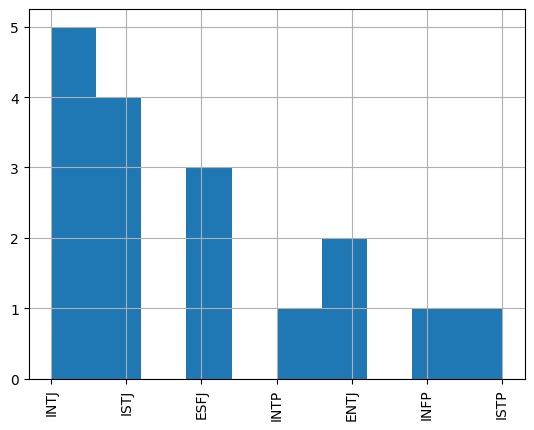

In [34]:
print(test_df_male.type.value_counts())
test_df_male.type.hist(xrot=90)
plt.show()

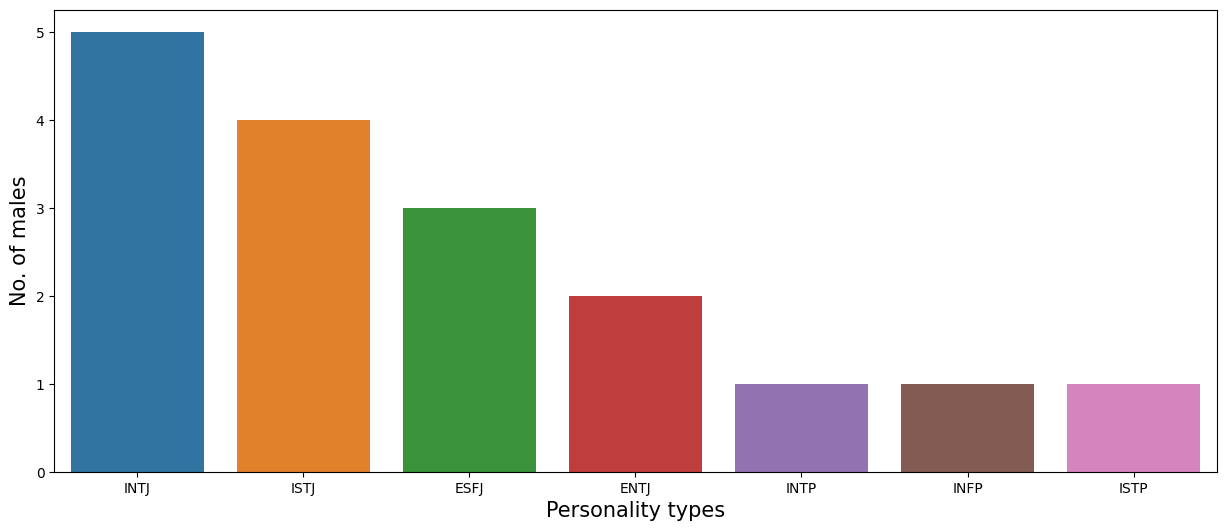

In [36]:
graph = test_df_male['type'].value_counts()
plt.figure(figsize=(15,6))
sb.barplot(x=graph.index, y=graph.values, alpha=1)
plt.xlabel('Personality types', fontsize=15)
plt.ylabel('No. of males', fontsize=15)
plt.show()

Females

ENTJ    6
ENFJ    5
ISTJ    2
ESFJ    2
ESTJ    1
INTJ    1
ENFP    1
ISFP    1
Name: type, dtype: int64


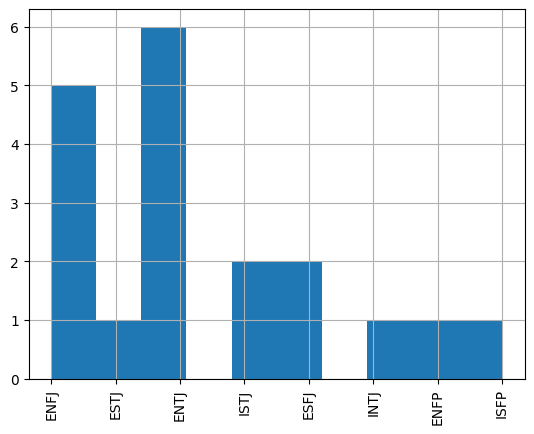

In [37]:
print(test_df_female.type.value_counts())
test_df_female.type.hist(xrot=90)
plt.show()

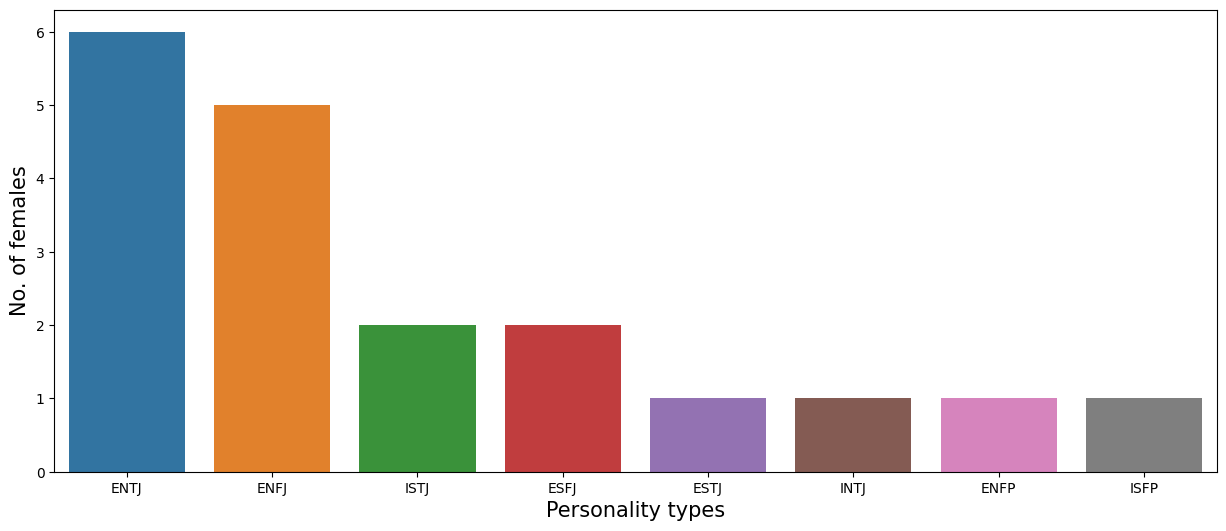

In [38]:
graph = test_df_female['type'].value_counts()
plt.figure(figsize=(15,6))
sb.barplot(x=graph.index, y=graph.values, alpha=1)
plt.xlabel('Personality types', fontsize=15)
plt.ylabel('No. of females', fontsize=15)
plt.show()

### Preprocessing on Test Data

In [39]:
test_df['ie'] = test_df.type
test_df['ns'] = test_df.type
test_df['ft'] = test_df.type
test_df['pj'] = test_df.type

for i, t in enumerate(test_df.type):
    if 'I' in t:
        test_df.ie[i] = 'I'
    elif 'E' in t:
        test_df.ie[i] = 'E'
        
    if 'N' in t:
        test_df.ns[i] = 'N'
    elif 'S' in t:
        test_df.ns[i] = 'S'
        
    if 'F' in t:
        test_df.ft[i] = 'F'
    elif 'T' in t:
        test_df.ft[i] = 'T'
        
    if 'P' in t:
        test_df.pj[i] = 'P'
    elif 'J' in t:
        test_df.pj[i] = 'J'


t_posts = test_df.posts.values
t_yIE = test_df.ie.values
t_yNS = test_df.ns.values
t_yFT = test_df.ft.values
t_yPJ = test_df.pj.values
t_y = test_df.type

C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3118015211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.ie[i] = 'I'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3118015211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.ns[i] = 'N'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19888\3118015211.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.ft[i] = 'T'
C:\Users\Admin\AppData\Local\Temp\ipyk

In [40]:
%%time
test_posts = test_df['posts']
test_posts = preprocess(test_posts)

1/37
2/37
3/37
4/37
5/37
6/37
7/37
8/37
9/37
10/37
11/37
12/37
13/37
14/37
15/37
16/37
17/37
18/37
19/37
20/37
21/37
22/37
23/37
24/37
25/37
26/37
27/37
28/37
29/37
30/37
31/37
32/37
33/37
34/37
35/37
36/37
37/37

CPU times: total: 844 ms
Wall time: 1.46 s


In [41]:
test_posts[0]

'vladimir putin met prime minister armenia nikol pashinyan sochi leader russia azerbaijan armenia following trilateral talk ilham aliyev nikol pashinyan meeting president azerbaijan ilham aliyev vladimir putin visit india participant guest ceremony conclude year scientific technical innovative cooperation talk president serbia aleksandar vucic conversation european council president charles migration crisis belarusian border conflict government member vladimir putin talk president serbia aleksandar vucic arabia host meeting russia islamic world strategic vision group greeting president vladimir putin meet president azerbaijan ilham aliyev prime minister armenia nikol pashinyan vladimir putin met president palestine mahmoud abbas top agenda middle east macedonia declared mourning life lost bulgarian crash vladimir putin expressed condolence president stevo pendarovski conversation prime minister italy mario gas supply europe development ukraine migration crisis head federal taxation ser

In [42]:
test_df['posts'] = test_posts
test_df.head()

,type,posts,Unnamed: 2,ie,ns,ft,pj
0,INTJ,vladimir putin met prime minister armenia niko...,NaN,I,N,T,J
1,ISTJ,welcome aboard year grant go group led expert ...,NaN,I,S,T,J
2,ESFJ,thank committed alleviating suffering let u re...,NaN,E,S,F,J
3,INTP,usually read lot book lately found drawn back ...,NaN,I,N,T,P
4,ENTJ,congratulation makhtar diop historic appointme...,NaN,E,N,T,J


### Preprocessing using tf-idf

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [43]:
%%time

#TF-IDF representation
# creating document frequency matrix
cv = CountVectorizer(analyzer="word", max_features=150).fit(posts)
X = cv.transform(posts)

CPU times: total: 7.75 s
Wall time: 8.19 s


In [44]:
tf = TfidfTransformer()
X_tf=  tf.fit_transform(X).toarray()

In [45]:
posts.shape, X.shape, X_tf.shape, yIE.shape, yNS.shape # verifying that the shapes match

((8675,), (8675, 150), (8675, 150), (8675,), (8675,))

In [46]:
%%time

#TF-IDF representation
# creating document frequency matrix
cv = CountVectorizer(analyzer="word", max_features=150).fit(test_posts)
X_test_cnt = cv.transform(test_posts)

CPU times: total: 31.2 ms
Wall time: 64.4 ms


In [47]:
X_test_tf=  tf.fit_transform(X_test_cnt).toarray()

In [48]:
t_posts.shape, X_test_cnt.shape, X_test_tf.shape, t_yIE.shape, t_yNS.shape # verifying that the shapes match

((37,), (37, 150), (37, 150), (37,), (37,))

## Training and testing data

In [113]:
xTrain = X_tf
yTrain = y

In [114]:
xTest = X_test_tf
yTest = t_y

In [115]:
xIETrain = X_tf
yIETrain = yIE

xNSTrain = X_tf
yNSTrain = yNS

xFTTrain = X_tf
yFTTrain = yFT

xPJTrain = X_tf
yPJTrain = yPJ

In [116]:
xIETest = X_test_tf
yIETest = t_yIE

xNSTest = X_test_tf
yNSTest = t_yNS

xFTTest = X_test_tf
yFTTest = t_yFT

xPJTest = X_test_tf
yPJTest = t_yPJ

## Label Encoding

In [117]:
frames = [df, test_df]
result = pd.concat(frames)

In [118]:

le = preprocessing.LabelEncoder()
result['type'] = le.fit_transform(result.type.values)

In [119]:
result.ie= le.fit_transform(result.ie.values)
result.ns= le.fit_transform(result.ns.values)
result.ft= le.fit_transform(result.ft.values)
result.pj= le.fit_transform(result.pj.values)

In [120]:
result.head(4)

,type,posts,ie,ns,ft,pj,Unnamed: 2
0,8,moment sportscenter top ten play experience re...,1,0,0,0,NaN
1,3,finding lack post boring position often exampl...,0,0,1,1,NaN
2,11,one course say blessing absolutely positive be...,1,0,1,1,NaN
3,10,enjoyed conversation day esoteric gabbing natu...,1,0,1,0,NaN


In [121]:
df_1 = result.iloc[:8675,:]
df_2 = result.iloc[8675:,:]

Label encoding type column of train data

Label encoding type column of test data

In [122]:
nyTrain = df_1['type']
nyTest = df_2['type']

label encoding ie, ns, ft, pj column of train data


In [123]:
yIE = df_1.ie
yNS = df_1.ns
yFT = df_1.ft
yPJ = df_1.pj

label encoding ie, ns, ft, pj column of test data


In [124]:
t_yIE = df_2.ie
t_yNS = df_2.ns
t_yFT = df_2.ft
t_yPJ = df_2.pj

To get actual performance of our models, I am using KFold cross validation with k=10 to get actual performance. These values will be pickled along with models, so that these can be used in scripts to allow users to see performance and reliability of each model corresponding to their characteristic pair.

# **3. Random Forest**

In [125]:
random_forest = RandomForestClassifier(n_estimators=100)

In [126]:
rnd_model =  RandomForestClassifier(n_estimators=100).fit(xTrain, nyTrain)
ieModel =  RandomForestClassifier(n_estimators=100).fit(xIETrain, yIE)
nsModel =  RandomForestClassifier(n_estimators=100).fit(xNSTrain, yNS)
ftModel =  RandomForestClassifier(n_estimators=100).fit(xFTTrain, yFT)
pjModel =  RandomForestClassifier(n_estimators=100).fit(xPJTrain, yPJ)

In [127]:
rnd_model.score(xTrain, nyTrain)

0.9997694524495677

In [128]:
print(rnd_model.score(xTest, nyTest))
print(ieModel.score(xIETest, t_yIE))
print(nsModel.score(xNSTest, t_yNS))
print(ftModel.score(xFTTest, t_yFT))
print(pjModel.score(xPJTest, t_yPJ))

0.05405405405405406
0.43243243243243246
0.5945945945945946
0.5675675675675675
0.2972972972972973


In [129]:
scores = []

scores.append(cross_val_score(estimator=rnd_model, cv=5, X=xTrain, y=nyTrain, scoring='accuracy'))
scores.append(cross_val_score(estimator=ieModel, cv=5, X=xTrain, y=yIE, scoring='accuracy'))
scores.append(cross_val_score(estimator=nsModel, cv=5, X=xTrain, y=yNS, scoring='accuracy'))
scores.append(cross_val_score(estimator=ftModel, cv=5, X=xTrain, y=yFT, scoring='accuracy'))
scores.append(cross_val_score(estimator=pjModel, cv=5, X=xTrain, y=yPJ, scoring='accuracy'))

#prining mean and standard deviations for each model
for score in scores:
    print(score.mean())
    print(score.std(), end='\n\n')

0.24092219020172911
0.008336454054992304

0.7697982708933717
0.0004610951008645614

0.8620172910662826
0.0002823619300038295

0.6723919308357349
0.011185714785667513

0.6038040345821327
0.0036012678620895465



In [145]:
scores = []

scores.append(cross_val_score(estimator=rnd_model, cv=5, X=xTest, y=nyTest, scoring='accuracy'))
scores.append(cross_val_score(estimator=ieModel, cv=5, X=xTest, y=t_yIE, scoring='accuracy'))
scores.append(cross_val_score(estimator=nsModel, cv=5, X=xTest, y=t_yNS, scoring='accuracy'))
scores.append(cross_val_score(estimator=ftModel, cv=5, X=xTest, y=t_yFT, scoring='accuracy'))
scores.append(cross_val_score(estimator=pjModel, cv=5, X=xTest, y=t_yPJ, scoring='accuracy'))

#prining mean and standard deviations for each model
for score in scores:
    print(score.mean())
    print(score.std(), end='\n\n')

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.13571428571428573
0.00874817765279706

0.5428571428571429
0.17878558586834037

0.5392857142857143
0.13093073414159545

0.6535714285714287
0.12351154618421842

0.8392857142857142
0.04517539514526255



In [146]:
print('Train Classification Report \n ',classification_report(nyTrain,rnd_model.predict(xTrain)))

Train Classification Report 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       675
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       685
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        89
           8       1.00      1.00      1.00      1470
           9       1.00      1.00      1.00      1832
          10       1.00      1.00      1.00      1091
          11       1.00      1.00      1.00      1304
          12       1.00      1.00      1.00       166
          13       1.00      1.00      1.00       271
          14       1.00      1.00      1.00       205
          15       1.00      1.00      1.00       337

    accuracy                           1.00      

## Prediction for Virat Kohli

In [147]:
virat_df = pd.read_csv("C:\\MBTI-Personality-Prediction-using-Tweets-master\\Dataset\\Analysis\\imVkohli_tweets.csv")
virat_df.head()

,id,created_at,favorite_count,retweet_count,text
0,1615758675528003585,2023-01-18 17:11:02+00:00,206089,11713,First win of the series and superb knock by Sh...
1,1614897799459635200,2023-01-16 08:10:13+00:00,26106,1276,.@OceanBeverages has some really small news! T...
2,1614656206936891395,2023-01-15 16:10:13+00:00,262923,18368,Triumphant series win. 🇮🇳🏆 https://t.co/M0zns...
3,1614134864063909889,2023-01-14 05:38:35+00:00,395652,14647,♥️ https://t.co/Varl9o8XqD
4,1613760933981216768,2023-01-13 04:52:43+00:00,15610,1017,"Hardly drive, don't drive because of WFH, extr..."


In [148]:
# jac_df = jacinda_df.rename(columns={'text': 'posts'})
vir_df = virat_df['text']

In [149]:
%%time
vir_posts = vir_df
vir_posts = preprocess(vir_posts)

1/49
2/49
3/49
4/49
5/49
6/49
7/49
8/49
9/49
10/49
11/49
12/49
13/49
14/49
15/49
16/49
17/49
18/49
19/49
20/49
21/49
22/49
23/49
24/49
25/49
26/49
27/49
28/49
29/49
30/49
31/49
32/49
33/49
34/49
35/49
36/49
37/49
38/49
39/49
40/49
41/49
42/49
43/49
44/49
45/49
46/49
47/49
48/49
49/49

CPU times: total: 62.5 ms
Wall time: 358 ms


In [150]:
# cv = CountVectorizer(analyzer="word", max_features=1500).fit(jac_posts)
vir_X = cv.transform(vir_posts)
vir_X_tf=  tf.fit_transform(vir_X).toarray()

In [151]:
predicted_ie = ieModel.predict(vir_X_tf)
ieModel.predict(vir_X_tf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [152]:
predicted_ns = nsModel.predict(vir_X_tf)
nsModel.predict(vir_X_tf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [153]:
predicted_ft = ftModel.predict(vir_X_tf)
ftModel.predict(vir_X_tf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1])

In [154]:
predicted_pj = pjModel.predict(vir_X_tf)
pjModel.predict(vir_X_tf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [156]:
virat_df['text'] = vir_posts
virat_df['predicted_ie'] = predicted_ie
virat_df['predicted_ns'] = predicted_ns
virat_df['predicted_ft'] = predicted_ft
virat_df['predicted_pj'] = predicted_pj
virat_df.drop(['created_at','favorite_count', 'retweet_count'], axis=1, inplace= True)
virat_df.head(3)

,id,text,predicted_ie,predicted_ns,predicted_ft,predicted_pj
0,1615758675528003585,first win series superb knock shubman,1,0,1,1
1,1614897799459635200,really small news popular fruit water availabl...,1,0,1,1
2,1614656206936891395,triumphant series win,1,0,1,1


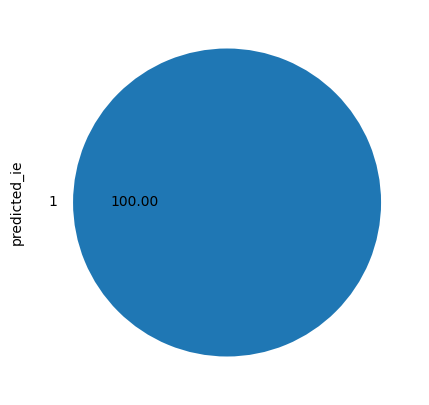

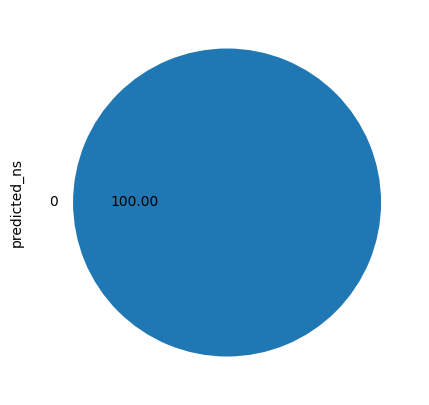

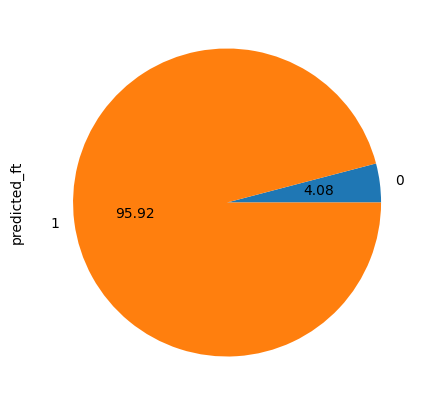

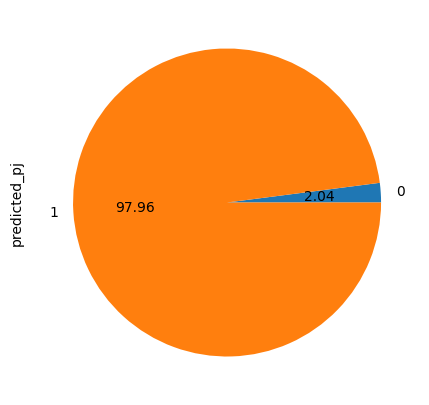

In [157]:
plt.figure(0)
virat_df.groupby('predicted_ie')['predicted_ie'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.figure(1)
virat_df.groupby('predicted_ns')['predicted_ns'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.figure(2)
virat_df.groupby('predicted_ft')['predicted_ft'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.figure(3)
virat_df.groupby('predicted_pj')['predicted_pj'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.show() #show all figures

<Figure size 640x480 with 0 Axes>

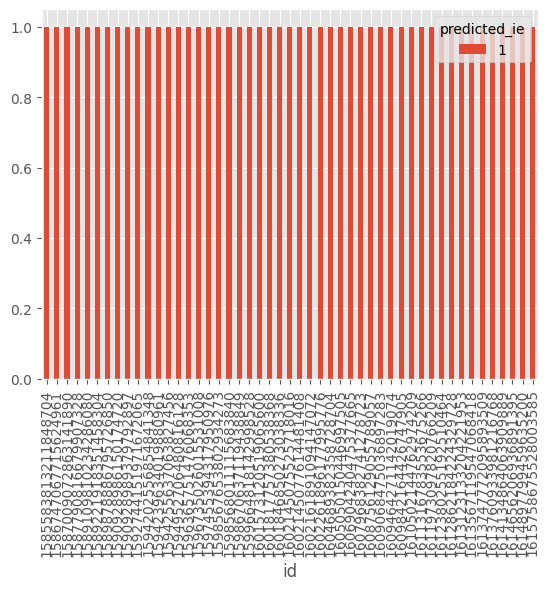

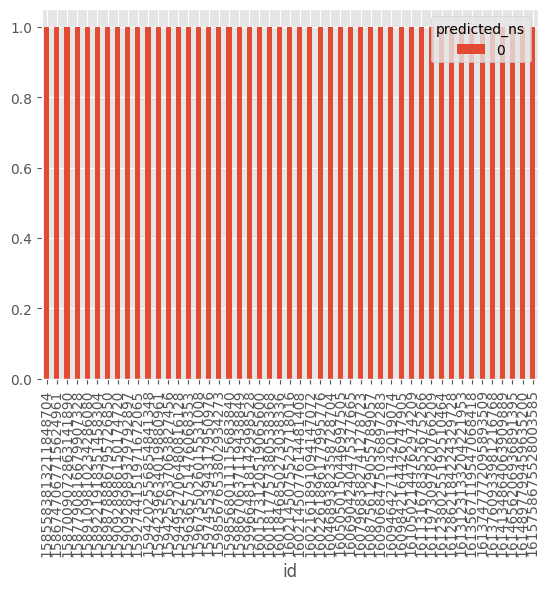

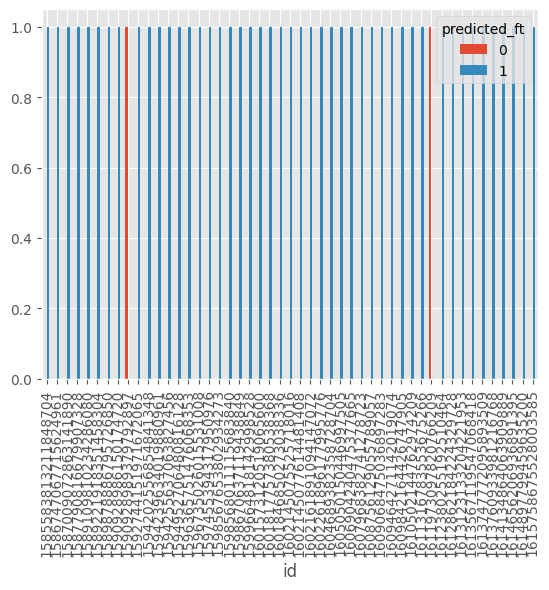

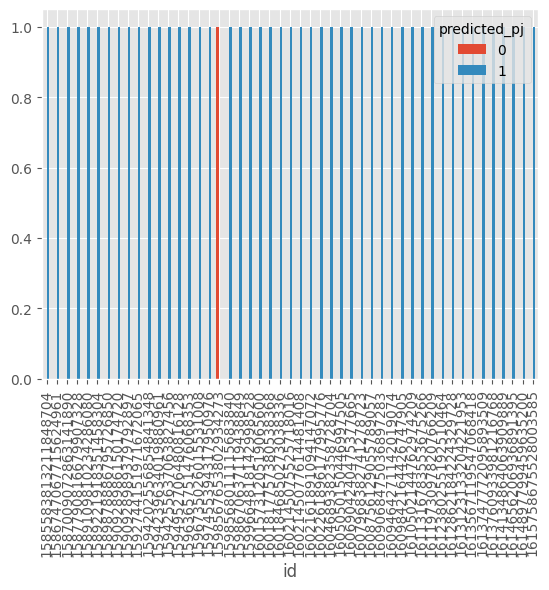

In [158]:
plt.style.use('ggplot')

plt.figure(0)
virat_df.groupby(['id','predicted_ie']).predicted_ie.count().unstack().plot.bar(legend=True)

plt.figure(1)
virat_df.groupby(['id','predicted_ns']).predicted_ns.count().unstack().plot.bar(legend=True)

plt.figure(2)
virat_df.groupby(['id','predicted_ft']).predicted_ft.count().unstack().plot.bar(legend=True)

plt.figure(3)
virat_df.groupby(['id','predicted_pj']).predicted_pj.count().unstack().plot.bar(legend=True)

plt.show() #show all figures

## Prediction for Jeff Bezos

In [192]:
jeff_df = pd.read_csv("C:\\MBTI-Personality-Prediction-using-Tweets-master\\Dataset\\Analysis\\JeffBezos_tweets.csv")
jeff_df.head()

,id,created_at,favorite_count,retweet_count,text
0,1606892394896822272,2022-12-25 05:59:36+00:00,38,2,@trevken Same to you 🎄
1,1606877122316111872,2022-12-25 04:58:54+00:00,22,0,@trevken Thank you
2,1595038534897139712,2022-11-22 12:56:35+00:00,5777,717,This year’s Bezos Day 1 Families Fund grants g...
3,1591558804960854017,2022-11-12 22:29:23+00:00,8849,1258,We’ve just announced a new Courage and Civilit...
4,1582517044020273152,2022-10-18 23:40:39+00:00,8669,1395,"Yep, the probabilities in this economy tell yo..."


In [193]:
# jac_df = jacinda_df.rename(columns={'text': 'posts'})
j_df = jeff_df['text']

In [194]:
%%time
j_posts = j_df
j_posts = preprocess(j_posts)

1/42
2/42
3/42
4/42
5/42
6/42
7/42
8/42
9/42
10/42
11/42
12/42
13/42
14/42
15/42
16/42
17/42
18/42
19/42
20/42
21/42
22/42
23/42
24/42
25/42
26/42
27/42
28/42
29/42
30/42
31/42
32/42
33/42
34/42
35/42
36/42
37/42
38/42
39/42
40/42
41/42
42/42

CPU times: total: 15.6 ms
Wall time: 19.5 ms


In [195]:
# cv = CountVectorizer(analyzer="word", max_features=1500).fit(jac_posts)
j_X = cv.transform(j_posts)
j_X_tf=  tf.fit_transform(j_X).toarray()

In [196]:
predicted_ie = ieModel.predict(j_X_tf)
ieModel.predict(j_X_tf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [197]:
predicted_ns = nsModel.predict(j_X_tf)
nsModel.predict(j_X_tf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [198]:
predicted_ft = ftModel.predict(j_X_tf)
ftModel.predict(j_X_tf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [199]:
predicted_pj = pjModel.predict(j_X_tf)
pjModel.predict(j_X_tf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [200]:
jeff_df['text'] = j_posts
jeff_df['predicted_ie'] = predicted_ie
jeff_df['predicted_ns'] = predicted_ns
jeff_df['predicted_ft'] = predicted_ft
jeff_df['predicted_pj'] = predicted_pj
jeff_df.drop(['created_at','favorite_count', 'retweet_count'], axis=1, inplace= True)
jeff_df.head(3)

,id,text,predicted_ie,predicted_ns,predicted_ft,predicted_pj
0,1606892394896822272,,1,0,1,1
1,1606877122316111872,thank,1,0,1,1
2,1595038534897139712,year bezos day family fund grant go incredible...,1,0,1,1


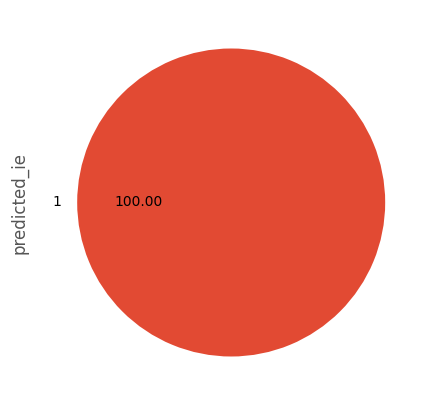

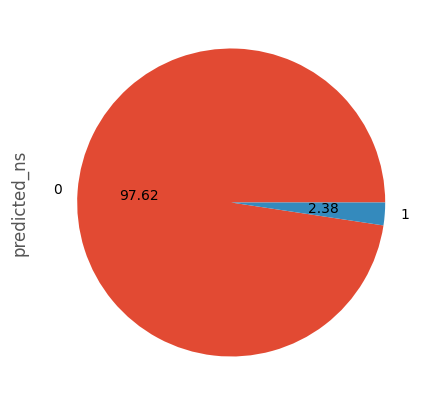

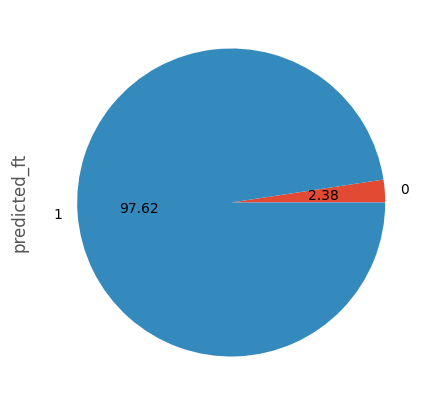

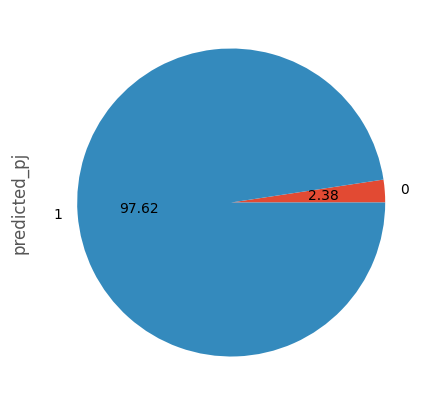

In [201]:
plt.figure(0)
jeff_df.groupby('predicted_ie')['predicted_ie'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.figure(1)
jeff_df.groupby('predicted_ns')['predicted_ns'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.figure(2)
jeff_df.groupby('predicted_ft')['predicted_ft'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.figure(3)
jeff_df.groupby('predicted_pj')['predicted_pj'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.show() #show all figures

<Figure size 640x480 with 0 Axes>

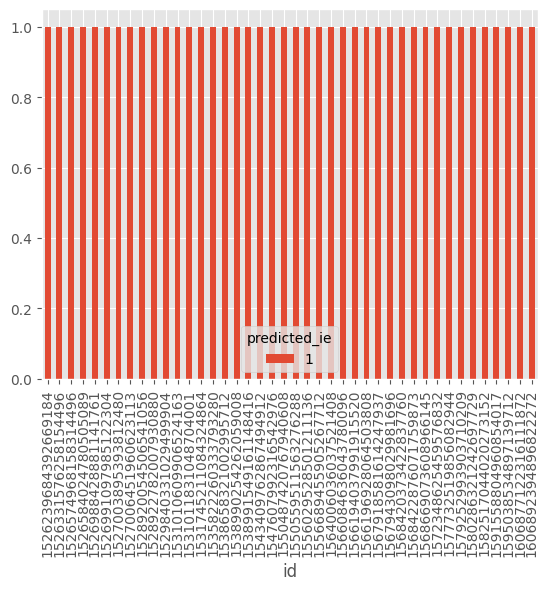

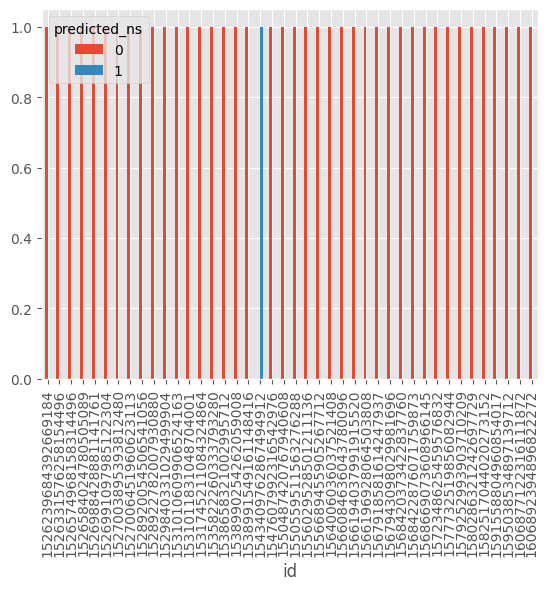

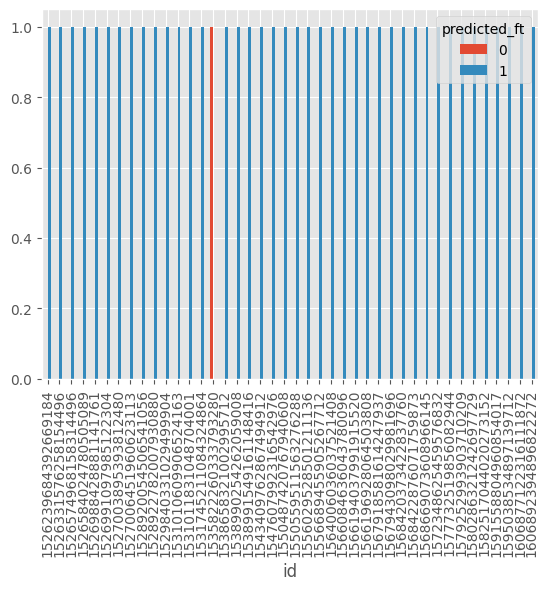

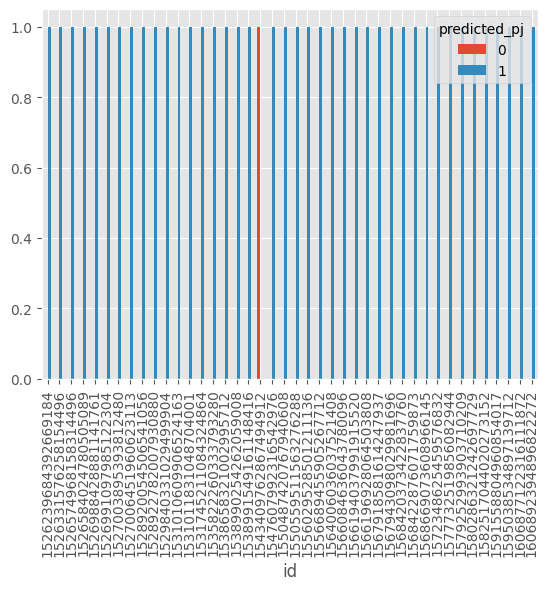

In [202]:
plt.style.use('ggplot')

plt.figure(0)
jeff_df.groupby(['id','predicted_ie']).predicted_ie.count().unstack().plot.bar(legend=True)

plt.figure(1)
jeff_df.groupby(['id','predicted_ns']).predicted_ns.count().unstack().plot.bar(legend=True)

plt.figure(2)
jeff_df.groupby(['id','predicted_ft']).predicted_ft.count().unstack().plot.bar(legend=True)

plt.figure(3)
jeff_df.groupby(['id','predicted_pj']).predicted_pj.count().unstack().plot.bar(legend=True)

plt.show() #show all figures